### Student: Angela Shane
#### Homework 05: Pharma

### Observations:
1. The drugs Ramicane and Capomulin have the best descrease in tumor size
2. The drugs Ramicane and Capomulin have the best survival rates
3. All drugs have an increase in number of metastic sites over time

In [73]:
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Read data into dataframes

In [74]:
ctrial_f = "./raw_data/clinicaltrial_data.csv"
ctrial_df = pd.read_csv(ctrial_f)
ctrial_df.head()
#len(ctrial_df) #1893
#len(ctrial_df["Mouse ID"].unique()) #249

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [75]:
mdrug_f = "./raw_data/mouse_drug_data.csv"
mdrug_df = pd.read_csv(mdrug_f)
mdrug_df.head()
#len(mdrug_df) #250
#len(mdrug_df["Mouse ID"].unique()) #249

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


#### Merge dataframes

In [76]:
results = pd.merge(ctrial_df, mdrug_df,how="left",on="Mouse ID")
#len(results) #1906 - duplicate mouseID on two drugs
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [77]:
summary = pd.DataFrame(results.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"mean", "Metastatic Sites":"sum", "Mouse ID":"count" }))
summary.reset_index(inplace=True)
summary.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID
0,Capomulin,0,45.000000,0,25
1,Capomulin,5,44.266086,4,25
2,Capomulin,10,43.084291,8,25
3,Capomulin,15,42.064317,9,24
4,Capomulin,20,40.716325,15,23


In [78]:
num_drugs = len(summary["Drug"].unique())
num_drugs

10

#### Pivot dataframe based on timepoint

In [79]:
summary_drug = summary.pivot(columns='Drug', index="Timepoint")
summary_drug.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                    ...     \
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol    ...      
Timepoint                                                           ...      
0          45.000000  45.000000  45.000000  45.000000  45.000000    ...      
5          47.125589  47.248967  43.944859  47.527452  46.851818    ...      
10         49.423329  49.101541  42.531957  49.463844  48.689881    ...      
15         51.359742  51.067318  41.495061  51.529409  50.779059    ...      
20         54.364417  53.346737  40.238325  54.067395  53.170334    ...      

           Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  

[5 rows x 30 columns]

In [80]:
xaxis = summary_drug.index #timepoint

In [81]:
# tumor volume changes over time for each treatment.
tumor = summary_drug["Tumor Volume (mm3)"]
tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


#### Generate random colors

In [82]:
import colorsys

HSV_tuples = [(x*1.0/num_drugs, 0.5, 0.5) for x in range(num_drugs)]
colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
colors

[(0.5, 0.25, 0.25),
 (0.5, 0.4, 0.25),
 (0.44999999999999996, 0.5, 0.25),
 (0.30000000000000004, 0.5, 0.25),
 (0.25, 0.5, 0.3500000000000001),
 (0.25, 0.5, 0.5),
 (0.25, 0.3500000000000001, 0.5),
 (0.2999999999999998, 0.25, 0.5),
 (0.4500000000000002, 0.25, 0.5),
 (0.5, 0.25, 0.3999999999999999)]

#### Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

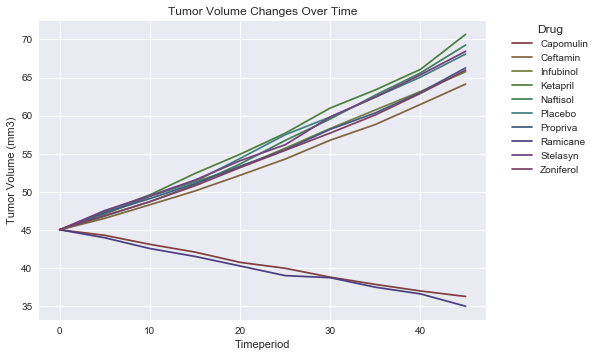

In [83]:
# https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python

for i in range(num_drugs):
    plt.plot(xaxis, tumor.iloc[:,i],color=colors[i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timeperiod')
plt.title('Tumor Volume Changes Over Time')
sns.set()
plt.savefig('tumor_change.png')
plt.show()

#### Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

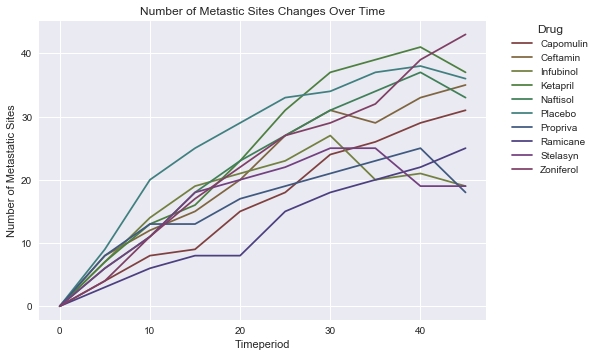

In [84]:
# number of metastatic (cancer spreading) sites changes over time for each treatment.
metastatic = summary_drug["Metastatic Sites"]
#metastatic.head()

for i in range(num_drugs):
    plt.plot(xaxis, metastatic.iloc[:,i],color=colors[i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Metastatic Sites')
plt.xlabel('Timeperiod')
plt.title('Number of Metastic Sites Changes Over Time')
sns.set()
plt.savefig('number_metastic_sites.png')
plt.show()

#### Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

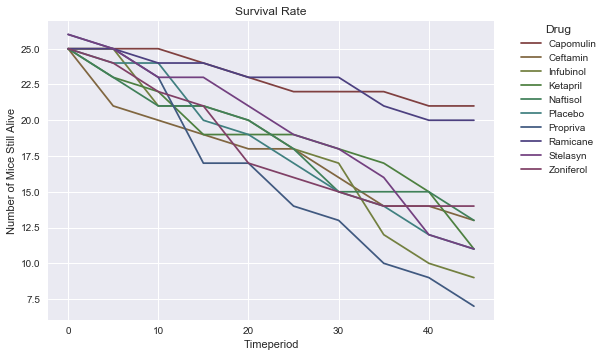

In [85]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

survival_rate = summary_drug["Mouse ID"]
survival_rate.head()

for i in range(num_drugs):
    plt.plot(xaxis, survival_rate.iloc[:,i],color=colors[i])

plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Mice Still Alive')
plt.xlabel('Timeperiod')
plt.title('Survival Rate')
sns.set()
plt.savefig('survival_rate.png')
plt.show()

#### Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [86]:
def get_change(current, previous):
    if current == previous:
        return 100.0
    try:
       return (abs(current - previous)/previous)*100.0
    except ZeroDivisionError:
        return 0

In [87]:
summary_drug["Tumor Volume (mm3)"]

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [88]:
tumor_volume = summary_drug["Tumor Volume (mm3)"].iloc[[0,-1]].transpose()
tumor_volume.columns=['first','last']
tumor_volume

,first,last
Drug,,
Capomulin,45.0,36.236114
Ceftamin,45.0,64.132421
Infubinol,45.0,65.755562
Ketapril,45.0,70.662958
Naftisol,45.0,69.265506
Placebo,45.0,68.084082
Propriva,45.0,66.258529
Ramicane,45.0,34.955595
Stelasyn,45.0,68.438310


In [89]:
tumor_volume['pct_chg'] =tumor_volume.apply(lambda row: get_change(row['last'], row['first']),axis=1)
tumor_volume

,first,last,pct_chg
Drug,,,
Capomulin,45.0,36.236114,19.475303
Ceftamin,45.0,64.132421,42.516492
Infubinol,45.0,65.755562,46.123472
Ketapril,45.0,70.662958,57.028795
Naftisol,45.0,69.265506,53.923347
Placebo,45.0,68.084082,51.297960
Propriva,45.0,66.258529,47.241175
Ramicane,45.0,34.955595,22.320900
Stelasyn,45.0,68.438310,52.085134


In [90]:
x_axis = np.arange(len(tumor_volume))
x_lbls = tumor_volume.index

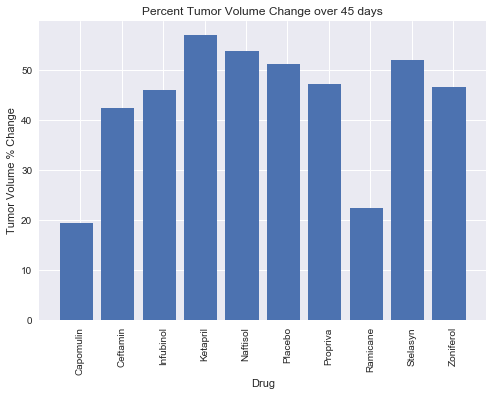

In [91]:
plt.bar(x_axis,tumor_volume['pct_chg'])
tick_locations = [value + 0.1 for value in x_axis]
plt.xticks(tick_locations, x_lbls, rotation=90)
plt.title("Percent Tumor Volume Change over 45 days")
plt.xlabel("Drug")
plt.ylabel("Tumor Volume % Change")
sns.set()
plt.savefig('pct_tumor_vol_chg.png')
plt.show()